In [2]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

Average precision-recall score: 0.88


In [8]:
print("y_test: ", y_test.shape)
print(y_test)

print("y_score: ", y_score.shape)
print(y_score)


y_test:  (50,)
[1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0
 0 0 0 1 1 1 1 0 1 1 0 1 0]
y_score:  (50,)
[-0.20078869  0.30423874  0.20105976  0.27523711  0.42593404 -0.15043726
 -0.08794601 -0.12733462  0.22931596 -0.23913518 -0.06386267 -0.14958466
 -0.04914839  0.09898417  0.0515638  -0.1142941   0.16106135  0.04871897
 -0.08258102 -0.26105668  0.24693291 -0.18029058 -0.38384994  0.26336904
  0.12585371 -0.03991278  0.39424539  0.42411536 -0.4790443  -0.30529061
 -0.09281931  0.01213433 -0.20204098  0.40148935 -0.04536122  0.12179099
  0.06493837 -0.07007139  0.0032915  -0.39635676  0.02619439  0.20018683
  0.065023    0.49589616 -0.28221895  0.31364573  0.1906223   0.11549516
  0.03145977  0.22408591]


In [6]:
def apScore(y_test, y_score):
    from sklearn.metrics import average_precision_score
    average_precision = average_precision_score(y_test, y_score)

    print('Average precision-recall score: {0:0.2f}'.format(
          average_precision))
    return average_precision
    
def plotAP(y_test, y_score):
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    from sklearn.utils.fixes import signature

    average_precision = apScore(y_test, y_score)
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    
    
    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))
    plt.show()

Average precision-recall score: 0.83


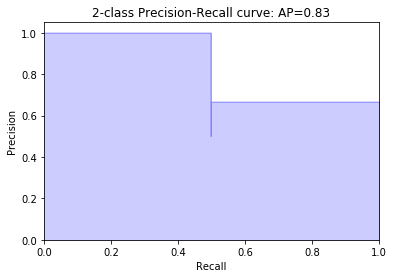

In [7]:
import numpy as np
from sklearn.metrics import average_precision_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
average_precision_score(y_true, y_scores) 
plotAP(y_true, y_scores)